# Ejemplo de Regresión Lineal Ransac.
Este es un ejemplo de Regresión Lineal patológica, donde los datos no se ajustan a un modelo lineal, pero tampoco a uno polinomial. En general en este tipo de problemas, las observaciones, cuando son visualizables por ser bidimensionales, un subconjunto mayoritario siguen un modelo lineal pero un pequeño grupo no. 

Este subgrupo pueden ser considerados como datos anómalos, pero la pregunta es cómo identificarlos.

## Importar librerías

In [1]:
import numpy as np

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from random import seed
import random

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats
from pylab import *

## Fijar semilla del generador de números aleatorios.

In [6]:
#seed(1234)

## Carga de datos

In [7]:
x1=[[0.1],[0.4],[1.5],[1.6],[2.1],[2.3],
    [0.1],[0.2],[0.5],[1.1],[0.3],[0.4],[1.0],[1.1],[1.4],[2.0],[2.1],[2.9],[3.1],[3.4],[4.0],[4.1],[4.2],[4.5],[5.0],[5.7],[6.0],[6.2],[6.5],[6.6],[6.8],[7.0], [7.6]]
y1=[5.5, 5.6, 5.2, 5.8, 5.1, 5.4,
    0.3,0.5,0.7,0.7,0.6,0.7,0.6,0.9,1.0, 1.1,1.7,2.0,2.5,3.2,3.2,3.3,4.1,4.9,6.4,8.2,8.6,8.9,9.1,9.4,9.6,9.8,10.2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


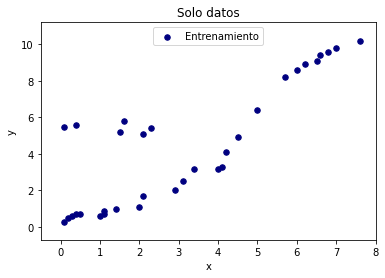

In [8]:
# Visualización de los datos.
plt.figure(1, plt.figure(1, figsize=(6,4)))
plt.scatter(x1, y1, color='navy', s=30, marker='o')

plt.ylim(np.min(y1)-1, np.max(y1)+1)
plt.xlim(-0.5, 8)

plt.title('Solo datos')
plt.legend(['Entrenamiento', 'Validación'], loc='upper center')
plt.xlabel("x")
plt.ylabel("y")

from google.colab import files
plt.savefig('RLP_solodatos.eps')

## Regresión Lineal Ordinaria

En la regresión lineal ordinaria no se descarta ninguna observación. Todas son tenidas en cuenta para construir el modelo. Como la búsqueda de los parámetros del modelo se realiza por la minización del error cuadrático medio, los datos anómalos y muy alejados del conjunto de observaciones que siguen el modelo lineal tendrán una gran influencia.

In [9]:
# Creación del modelo lineal
modelo_g1 = linear_model.LinearRegression(fit_intercept = True).fit(x1, y1)

In [10]:
# Coeficientes del modelo
print("Parameters:", modelo_g1.intercept_, modelo_g1.coef_)

Parameters: 0.8233672418736799 [1.15548999]


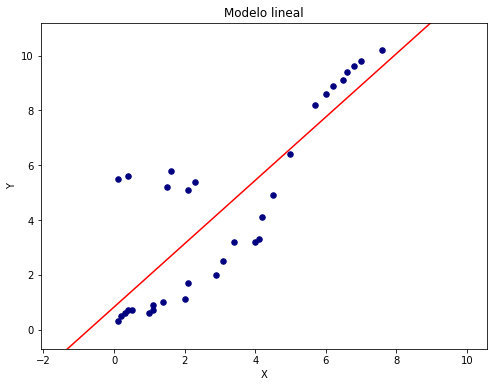

In [11]:
# Visualización de los resultados del modelo
plt.figure(1, plt.figure(1, figsize=(8,6)))
X=np.linspace(-1.5, 10, 25)

plt.scatter(x1, y1, color='navy', s=30, marker='o')
plt.plot(X, modelo_g1.predict(X[:,np.newaxis]), color = 'red')
plt.ylim(np.min(y1)-1, np.max(y1)+1)
plt.title('Modelo lineal')
plt.xlabel("X")
plt.ylabel("Y")

from google.colab import files
plt.savefig('RL_g1.eps')
#files.download('RL_g1.eps') # Descomentar para descargar localmente

La recta que representa al modelo se aleja del conjunto de observaciones por la influencia de los puntos anómalos.

## Regresión Lineal Ransac

In [12]:
# Creación del modelo lineal Ransac
modelo_RLR = linear_model.RANSACRegressor().fit(x1, y1)

In [13]:
# Coeficientes del modelo lineal Ransac
print("Parameters:", modelo_RLR)

Parameters: RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)


In [14]:
# Se ajusta el modelo lineal Ransac
ransac = linear_model.RANSACRegressor()
ransac.fit(x1, y1)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [15]:
# Se crean máscaras lógicas sobre qué observaciones se consideran normales (inliers) y cuales no (outliers). 
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [16]:
# Se predicen datos sobre el modelo estimado.
line_X = np.arange(np.min(x1)-2, np.max(x1)+2)[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

In [17]:
# Comparación de los coeficientes de ambos modelos lineales: ordinario y Ransac.
print("Estimated coefficients (linear regression, RANSAC):")
print( modelo_g1.coef_)
print(ransac.estimator_.coef_)

Estimated coefficients (linear regression, RANSAC):
[1.15548999]
[1.39202716]


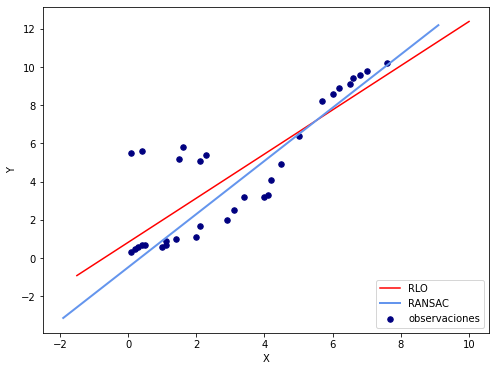

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x1, y1, color='navy', s=30, marker='o', label="observaciones")
plt.plot(X, modelo_g1.predict(X[:,np.newaxis]), color = 'red', label='RLO')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2,
         label='RANSAC')
plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [19]:
x1=np.asarray(x1)
y1=np.asarray(y1)

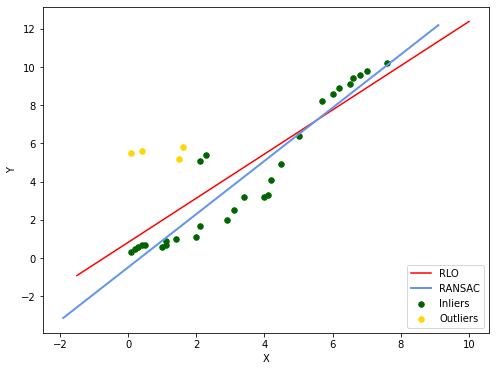

In [20]:
plt.figure(figsize=(8,6))
#lw = 2
plt.scatter(x1[inlier_mask], y1[inlier_mask], color='darkgreen', s=30, marker='o', label='Inliers')
plt.scatter(x1[outlier_mask], y1[outlier_mask], color='gold', s=30, marker='o', label='Outliers')
plt.plot(X, modelo_g1.predict(X[:,np.newaxis]), color = 'red', label='RLO')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC')
plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()